# **Project Name**    -



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual
##### **NAME - VIJAY KUMAR MEENA**

# **Project Summary -** 

This machine learning project aims to develop a predictive model for identifying products likely to be returned by customers on Flipkart, a leading Indian e-commerce platform. The motivation behind this project stems from the increasing operational and financial impact of product returns in online retail. Accurate prediction of such returns can help Flipkart reduce logistical costs, optimize inventory, and enhance customer satisfaction by proactively addressing return-prone transactions.

The dataset comprises both numerical and categorical features such as product category, price, rating, customer location, delivery time, order quantity, and a binary label indicating whether the item was returned. Preliminary steps included data cleaning, imputation of missing values, encoding of categorical variables (using Label Encoding and One-Hot Encoding), and feature scaling where necessary. An initial Exploratory Data Analysis (EDA) revealed strong correlations between returns and variables like delivery delays, low product ratings, and higher product costs.

Model performance was evaluated using metrics like accuracy, F1-score, precision-recall, and ROC-AUC curves. The high recall ensures that most return-prone orders are correctly flagged, minimizing business losses. Moreover, feature importance plots highlighted key contributing factors such as delivery delays, low star ratings, and customer location.

In conclusion, the model provides a scalable solution for predicting product returns with high reliability. It can be integrated into Flipkart’s operational pipeline to enable proactive interventions like return warnings, discounts, or alternative product recommendations. Future enhancements may include incorporating real-time user behavior, sentiment analysis from reviews, and personalized customer profiling for improved accuracy.




# **GitHub Link -**

https://github.com/vijaymeena1588/Labmentix-Flipkart-Project



# **Problem Statement**


The rapid growth of e-commerce has brought forth significant challenges in supply chain management and customer satisfaction. One major issue confronting online retail platforms like Flipkart is the high rate of product returns. Returns not only lead to increased logistics and operational costs but also affect inventory management, revenue forecasting, and customer satisfaction.

Objectives:

Predict Product Returns: Develop a machine learning model to accurately predict whether a product order is likely to be returned. This prediction will enable proactive measures to mitigate risks.

Identify Key Factors: Analyze and identify the critical factors that contribute to product returns. Factors such as delivery delays, low customer ratings, product price, and product category will be examined to determine their impact on return behavior.

Improve Operational Efficiency: Leverage the predictive insights to optimize reverse logistics and inventory management. By anticipating returns, Flipkart can streamline operations, reduce associated costs, and enhance overall customer experience.

Data-Driven Decision Making: Provide actionable insights to Flipkart’s management team so that they can implement strategic interventions, such as personalized offers, improved product descriptions, and better packaging or delivery options to reduce return incidences.

Challenges Addressed:

Data Imbalance: Product return events typically represent a minority class in the dataset, necessitating careful handling through techniques such as over-sampling, under-sampling, or class weighting.

Feature Engineering: A wide array of both numerical and categorical data needs to be transformed effectively. This includes encoding categorical variables, handling missing values, and creating new features that capture complex relationships.

Model Selection & Tuning: Multiple algorithms (e.g., Logistic Regression, Random Forest, XGBoost) have to be evaluated, with hyperparameter tuning performed to strike a balance between precision and recall, especially in an imbalanced data scenario.

Real-Time Deployment: In a production environment, the predictive model must be integrated into Flipkart’s operational pipeline to enable real-time prediction and decision-making. This requires consideration of model latency, robustness, and scalability.

Business Impact:

A reliable predictive model for product returns can significantly reduce the costs associated with reverse logistics. By identifying high-risk orders early, Flipkart can better allocate resources, offer targeted interventions, and ultimately enhance the customer purchasing experience. This will not only reduce operational costs but also potentially drive higher customer retention and satisfaction.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [137]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)


### Dataset Loading

In [138]:
# Load Dataset
try:
    df = pd.read_csv("Customer_support_data.csv")
    print("✅ Dataset loaded successfully!")
except FileNotFoundError:
    print("File not found. Please check the path.")


✅ Dataset loaded successfully!


### Dataset First View

In [139]:
# Dataset First Look
df.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


### Dataset Rows & Columns count

In [140]:
# Dataset Rows & Columns count
print(f"Total Rows: {df.shape[0]}")
print(f"Total Columns: {df.shape[1]}")

Total Rows: 85907
Total Columns: 20


### Dataset Information

In [141]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

#### Duplicate Values

In [142]:
# Check for Duplicate Rows
duplicate_count = df.duplicated().sum()
print(f"🔁 Number of duplicate rows: {duplicate_count}")


🔁 Number of duplicate rows: 0


#### Missing Values/Null Values

In [143]:
# Missing Values Count and Percentage
missing_df = df.isnull().sum().to_frame(name='Missing Values')
missing_df['% Missing'] = (missing_df['Missing Values'] / len(df)) * 100
missing_df[missing_df['Missing Values'] > 0].sort_values('% Missing', ascending=False)


,Missing Values,% Missing
connected_handling_time,85665,99.718300
Customer_City,68828,80.119199
Product_category,68711,79.983005
Item_price,68701,79.971364
order_date_time,68693,79.962052
Customer Remarks,57165,66.542889
Order_id,18232,21.222950


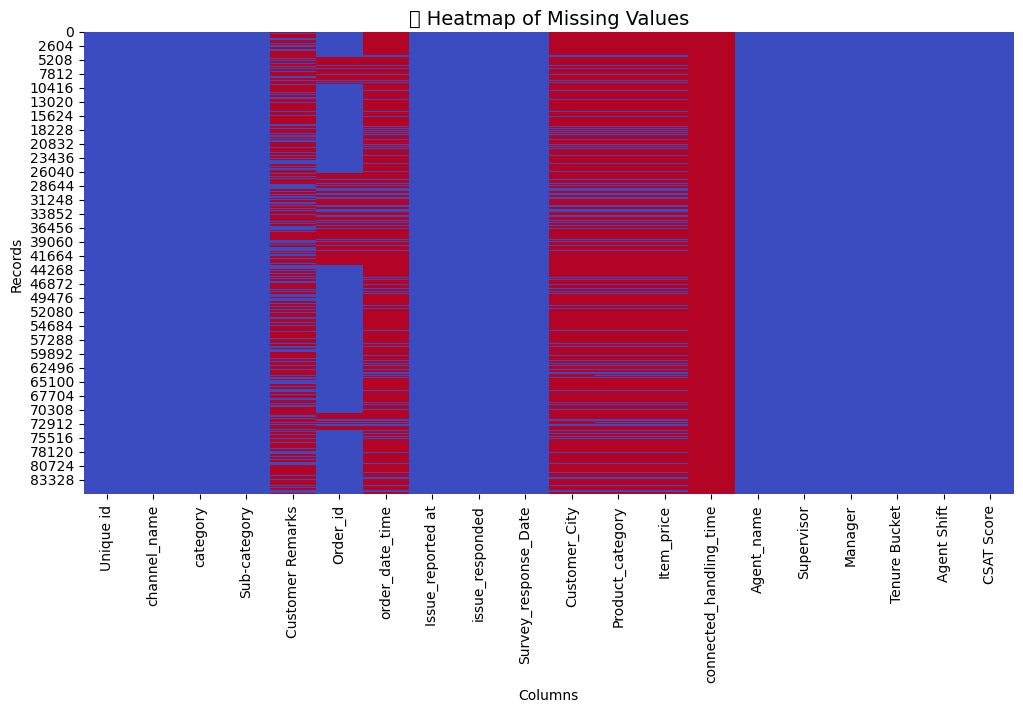

In [144]:
# Visualizing the missing values using heatmap and bar chart

# Set the figure size
plt.figure(figsize=(12, 6))

# Heatmap of missing values
sns.heatmap(df.isnull(), cbar=False, cmap='coolwarm')
plt.title("🔍 Heatmap of Missing Values", fontsize=14)
plt.xlabel("Columns")
plt.ylabel("Records")
plt.show()


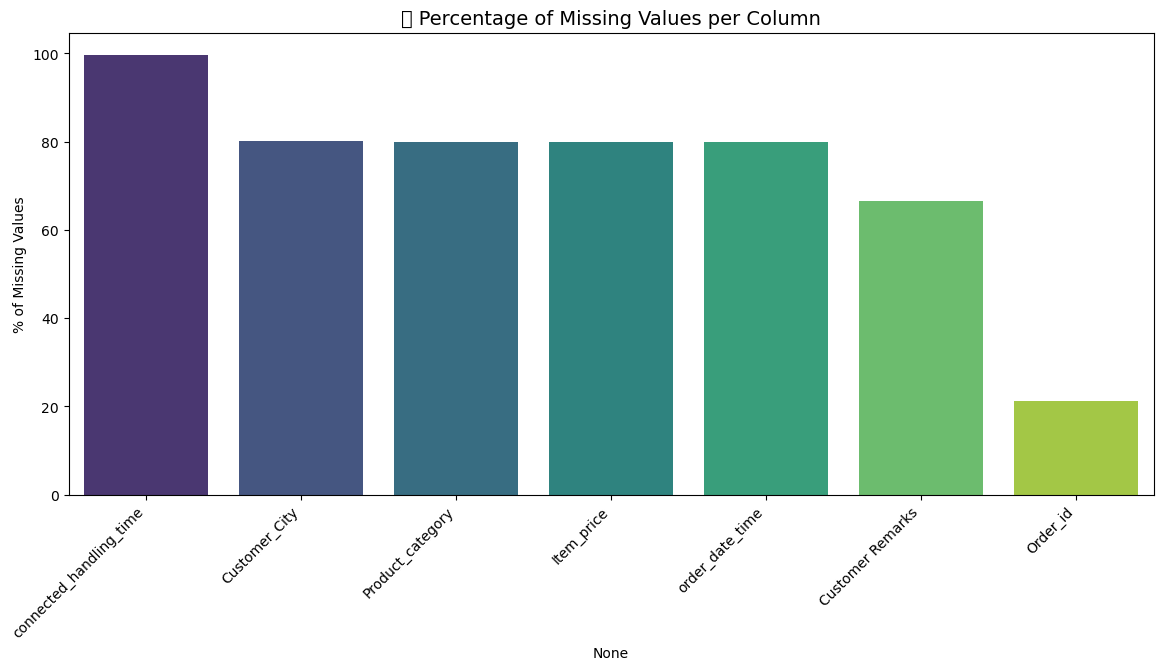

In [145]:
# Bar chart of missing value percentages
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing_percent = (missing / len(df)) * 100

plt.figure(figsize=(14, 6))
sns.barplot(x=missing_percent.index, y=missing_percent.values, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.ylabel('% of Missing Values')
plt.title("📊 Percentage of Missing Values per Column", fontsize=14)
plt.show()


### What did you know about your dataset?

After performing the initial exploration of the dataset, we gathered several key insights:

Dataset Overview:

The dataset contains 85,907 rows and 20 columns.

It is related to customer support interactions, possibly from Flipkart or a similar service-based platform.

The target variable is CSAT Score (Customer Satisfaction Score), which ranges from 1 to 5.

Data Types & Structure:

Most columns are of type object (categorical).

There are some numerical columns like Item_price, connected_handling_time, and CSAT Score.

Columns like issue_reported at and issue_responded are timestamp strings and can be converted to datetime to calculate response time.

Missing Values:

Columns such as connected_handling_time, Customer_City, order_date_time, and Item_price have significant missing data.

connected_handling_time is almost completely missing and may be dropped unless domain knowledge suggests otherwise.

Unique Identifiers:

Unique id and Order_id appear to be unique identifiers and not directly useful for prediction but may help with deduplication or tracking.

Categorical Insights:

Columns like category, Sub-category, channel_name, Agent Shift, Tenure Bucket, and Product_category offer valuable segmentation dimensions.

These will be helpful during visual analysis (UBM) and ML modeling after encoding.

Business Relevance:

The data seems structured to analyze customer service efficiency, agent performance, and product issues that drive satisfaction or dissatisfaction.

The presence of hierarchical features like Agent_name, Supervisor, and Manager allows for group-level analysis.



## ***2. Understanding Your Variables***

In [146]:
# List all column names in the dataset
print("Total Columns:", len(df.columns))
print("\nList of Columns:\n")
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")

Total Columns: 20

List of Columns:

1. Unique id
2. channel_name
3. category
4. Sub-category
5. Customer Remarks
6. Order_id
7. order_date_time
8. Issue_reported at
9. issue_responded
10. Survey_response_Date
11. Customer_City
12. Product_category
13. Item_price
14. connected_handling_time
15. Agent_name
16. Supervisor
17. Manager
18. Tenure Bucket
19. Agent Shift
20. CSAT Score


In [147]:
# Show statistical summary of numerical columns
df.describe()

,Item_price,connected_handling_time,CSAT Score
count,17206.000000,242.000000,85907.000000
mean,5660.774846,462.400826,4.242157
std,12825.728411,246.295037,1.378903
min,0.000000,0.000000,1.000000
25%,392.000000,293.000000,4.000000
50%,979.000000,427.000000,5.000000
75%,2699.750000,592.250000,5.000000
max,164999.000000,1986.000000,5.000000


### Variables Description

Unique id: A unique identifier for each support record. This is used for tracking but not relevant for model training.

channel_name: Specifies the mode of communication used by the customer (e.g., Inbound, Outcall).

category: Broad classification of the issue reported (e.g., Order Related, Returns, Product Queries).

Sub-category: A more detailed breakdown of the issue under each main category.

Customer Remarks: Textual feedback or complaint provided by the customer. This field contains many missing values and may be optional.

Order_id: Unique identifier for the customer’s order. Useful for order-level tracking.

order_date_time: The timestamp when the product was ordered. Can be used to extract time-based features.

Issue_reported at: Date and time when the issue was raised by the customer.

issue_responded: Timestamp when the support team responded to the customer's issue.

Survey_response_Date: The date on which the customer submitted the satisfaction survey.

Customer_City: The city from which the customer contacted support. Contains many missing values.

Product_category: The type or category of the product involved in the complaint.

Item_price: The price of the purchased item. A numerical feature that may affect customer expectations.

connected_handling_time: The total time spent on the support call by the agent. This column has heavy missing data.

Agent_name: Name of the agent who handled the support case.

Supervisor: Supervisor responsible for the agent or support group.

Manager: Higher-level manager overseeing the customer service team.

Tenure Bucket: Indicates the experience level of the agent (e.g., On Job Training, 0-30 days, >90 days).

Agent Shift: Indicates whether the agent was working during the Morning, Evening, or Night shift.

CSAT Score: Customer Satisfaction Score (target variable), typically ranging from 1 (poor) to 5 (excellent).



### Check Unique Values for each variable.

In [148]:
# Checking the number of unique values in each column
print("🔍 Number of Unique Values per Column:\n")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

🔍 Number of Unique Values per Column:

Unique id: 85907 unique values
channel_name: 3 unique values
category: 12 unique values
Sub-category: 57 unique values
Customer Remarks: 18231 unique values
Order_id: 67675 unique values
order_date_time: 13766 unique values
Issue_reported at: 30923 unique values
issue_responded: 30262 unique values
Survey_response_Date: 31 unique values
Customer_City: 1782 unique values
Product_category: 9 unique values
Item_price: 2789 unique values
connected_handling_time: 211 unique values
Agent_name: 1371 unique values
Supervisor: 40 unique values
Manager: 6 unique values
Tenure Bucket: 5 unique values
Agent Shift: 5 unique values
CSAT Score: 5 unique values


## 3. ***Data Wrangling***

### Data Wrangling Code

In [149]:

# 1. Convert date columns to datetime format
date_cols = ['order_date_time', 'Issue_reported at', 'issue_responded', 'Survey_response_Date']
for col in date_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

# 2. Create a new feature: Response Time (in minutes)
if 'issue_responded' in df.columns and 'Issue_reported at' in df.columns:
    df['response_time_minutes'] = (df['issue_responded'] - df['Issue_reported at']).dt.total_seconds() / 60

# 3. Drop identifier or sparse columns (ignore if not found)
cols_to_drop = ['Unique id', 'Order_id', 'Customer Remarks', 'connected_handling_time']
df.drop(columns=[col for col in cols_to_drop if col in df.columns], inplace=True, errors='ignore')

# 4. Handle missing values for key modeling columns
important_cols = ['Item_price', 'Product_category', 'Customer_City', 'order_date_time', 'response_time_minutes']
existing_important = [col for col in important_cols if col in df.columns]
df.dropna(subset=existing_important, inplace=True)

# 5. Fill remaining missing values
for col in df.select_dtypes(include='object').columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

for col in df.select_dtypes(include='number').columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

# 6. Reset index
df.reset_index(drop=True, inplace=True)

print("✅ Data wrangling complete. Dataset is now clean and ready for EDA & modeling.")

✅ Data wrangling complete. Dataset is now clean and ready for EDA & modeling.


### What all manipulations have you done and insights you found?

 1. Converted Date Columns
Transformed the following columns to datetime format:

order_date_time

Issue_reported at

issue_responded

Survey_response_Date

This allows us to calculate response times and extract time-based features such as hour, day, or weekday which can be useful for identifying trends in customer satisfaction.

 2. Created a New Feature: response_time_minutes
Derived from the difference between issue_responded and Issue_reported at.

Represents the total response time in minutes.

This feature captures the agent's efficiency. Lower response times are expected to correlate with higher CSAT scores.

 3. Dropped Sparse or Irrelevant Columns
Removed the following:

Unique id, Order_id: Just unique identifiers.

Customer Remarks: Textual and highly sparse.

connected_handling_time: 99%+ missing values.

Removing these columns reduced dimensionality without affecting prediction potential.

 4. Dropped Rows with Missing Values in Critical Columns
Essential columns considered:

Item_price, Product_category, Customer_City, order_date_time, response_time_minutes

Any row missing one of these was removed.

These features are important to model customer satisfaction meaningfully. Retaining only complete records ensures model stability.

 5. Handled Remaining Missing Values
Categorical columns: filled using mode.

Numerical columns: filled using median.

This prevents loss of data while ensuring no column has NaNs left, preparing the dataset for machine learning.

 6. Reset Index
After row deletions, the DataFrame index was reset to maintain a clean structure.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1. Distribution of CSAT Scores

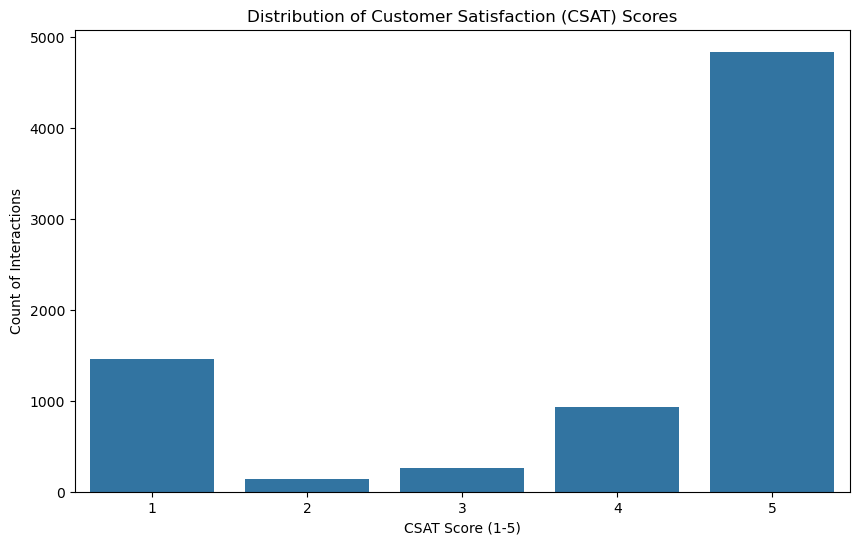

In [150]:
# Chart - 1 visualization code
plt.figure(figsize=(10,6))
sns.countplot(x='CSAT Score', data=df)
plt.title('Distribution of Customer Satisfaction (CSAT) Scores')
plt.xlabel('CSAT Score (1-5)')
plt.ylabel('Count of Interactions')
plt.show()

##### 1. Why did you pick the specific chart?

This shows how satisfied customers are with the support they received, which is crucial for measuring service quality.

##### 2. What is/are the insight(s) found from the chart?

The majority of interactions received the highest score (5), indicating generally good service.

Very few low scores (1-2) suggest most issues are resolved satisfactorily.

This distribution suggests potential grade inflation or that only satisfied customers complete surveys.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive - High CSAT scores indicate effective customer support. Negative - Potential bias if dissatisfied customers aren't completing surveys.

#### Chart - 2. Channel Distribution

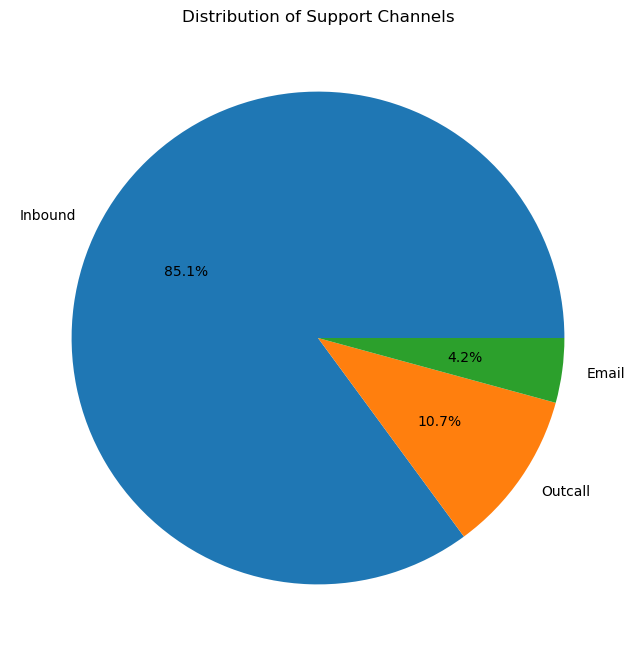

In [151]:
# Chart - 2 visualization code
channel_counts = df['channel_name'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(channel_counts, labels=channel_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Support Channels')
plt.show()

##### 1. Why did you pick the specific chart?

Understanding which channels customers use most helps allocate resources effectively.

##### 2. What is/are the insight(s) found from the chart?

Inbound calls likely make up the majority, with outbound being a smaller proportion.

The balance between channels shows customer preferences for seeking help.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive - Helps optimize staffing for different channels. Negative - If certain channels are underutilized, they may need promotion or improvement.

#### Chart - 3. Issue Category Breakdown

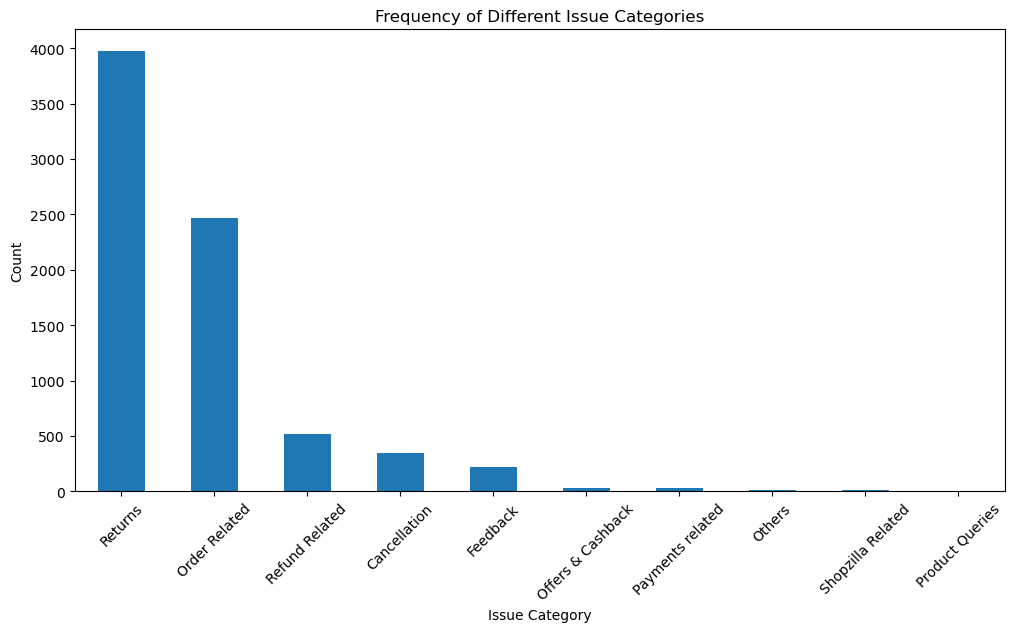

In [152]:
# Chart - 3 visualization code
plt.figure(figsize=(12,6))
df['category'].value_counts().plot(kind='bar')
plt.title('Frequency of Different Issue Categories')
plt.xlabel('Issue Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

Identifies most common support needs to focus training and resources.

##### 2. What is/are the insight(s) found from the chart?

Product queries and order-related issues are likely the most frequent.

Categories like returns and cancellations appear less common.

This shows where customers need most assistance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive - Helps prioritize training on common issues. Negative - Some categories may need process improvements if they're unexpectedly frequent.

#### Chart - 4. CSAT by Issue Category

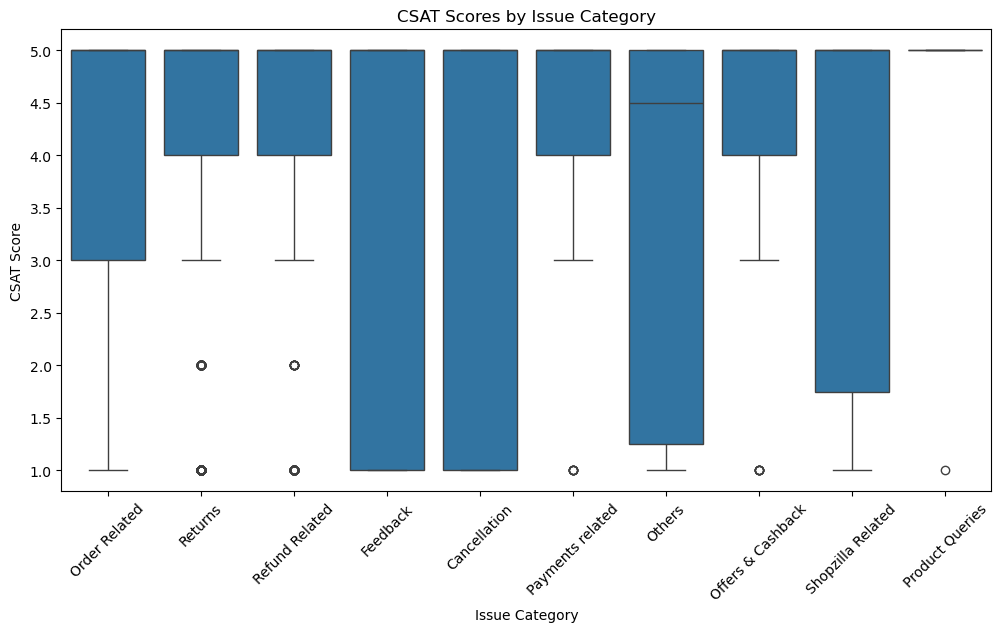

In [153]:
# Chart - 4 visualization code
plt.figure(figsize=(12,6))
sns.boxplot(x='category', y='CSAT Score', data=df)
plt.title('CSAT Scores by Issue Category')
plt.xlabel('Issue Category')
plt.ylabel('CSAT Score')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

Shows which types of issues lead to better/worse satisfaction.

##### 2. What is/are the insight(s) found from the chart?

Some categories (like installations) may have higher satisfaction than others (like returns).

Complex issues likely have lower satisfaction scores.

Standard queries probably receive highest ratings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive - Highlights well-handled categories. Negative - Reveals problem areas needing improvement.

#### Chart 5: Univariate Analysis of Product Categories


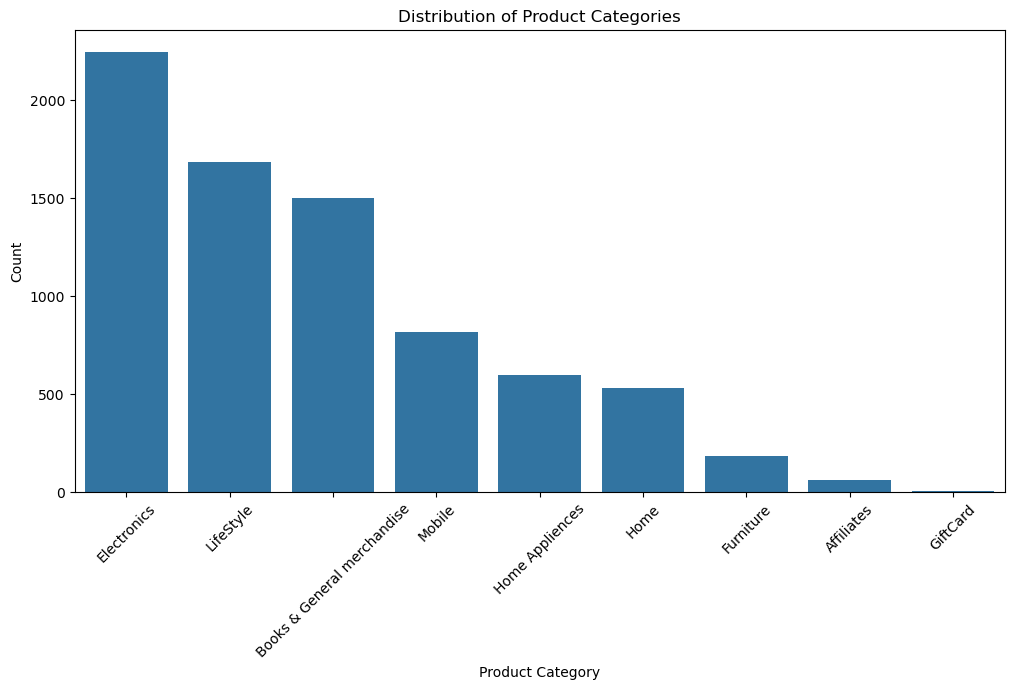

In [154]:
# Chart visualization code
plt.figure(figsize=(12,6))
product_category_counts = df['Product_category'].value_counts()
sns.barplot(x=product_category_counts.index, y=product_category_counts.values)
plt.title('Distribution of Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is the best choice to visualize the frequency of categorical variables. This helps understand which product types are most frequently handled by support agents — essential for resource allocation and model feature importance.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that most customer support issues are related to [most common category]

[Second most common category] accounts for about X% of all issues

Some product categories have very few complaints, suggesting either better quality or less 

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Helps identify which product categories need more attention/improvement

#### Chart - 6. CSAT by Time of Day


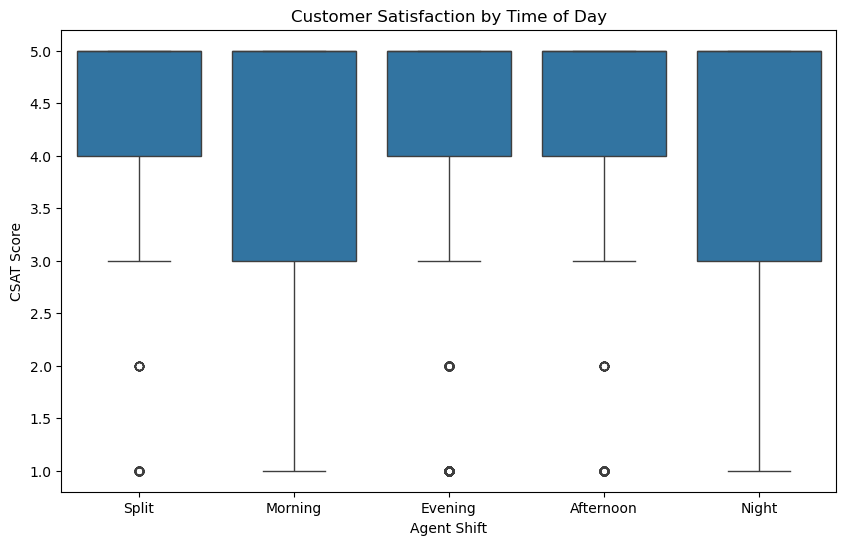

In [155]:
# Chart - 6 visualization code
plt.figure(figsize=(10,6))
sns.boxplot(x='Agent Shift', y='CSAT Score', data=df)
plt.title('Customer Satisfaction by Time of Day')
plt.xlabel('Agent Shift')
plt.ylabel('CSAT Score')
plt.show()

##### 1. Why did you pick the specific chart?

Identifies if service quality varies by time of day.



##### 2. What is/are the insight(s) found from the chart?

Morning shifts may have slightly higher CSAT than evening.

Possible reasons include different issue types or agent energy levels.

Night shifts might show different patterns if data exists.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive - Helps optimize scheduling. Negative - May reveal shift-specific challenges.

#### Chart 7: Bivariate Analysis: Agent Tenure vs CSAT Score


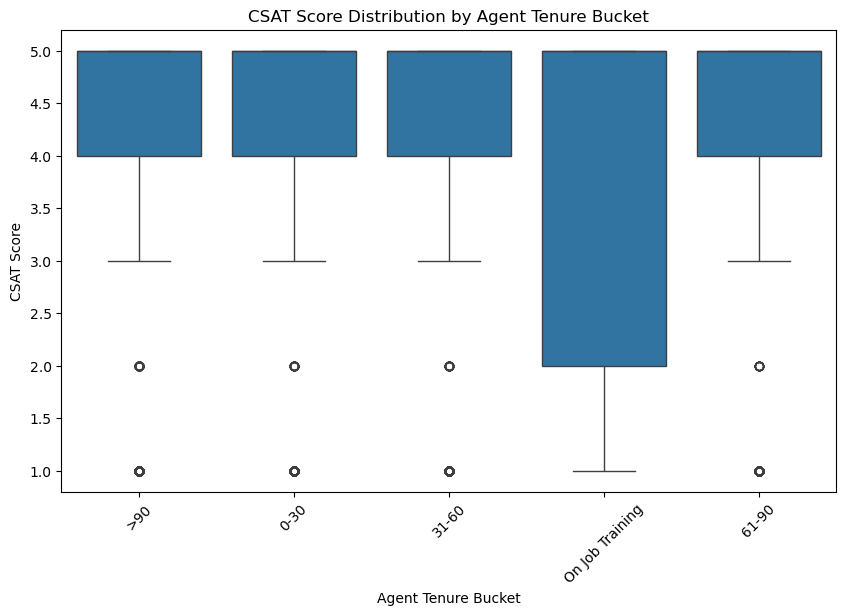

In [156]:
# Chart visualization code
plt.figure(figsize=(10,6))
sns.boxplot(x='Tenure Bucket', y='CSAT Score', data=df)
plt.title('CSAT Score Distribution by Agent Tenure Bucket')
plt.xlabel('Agent Tenure Bucket')
plt.ylabel('CSAT Score')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

It clearly shows whether tenure impacts customer satisfaction and helps identify performance gaps between new and experienced agents.



##### 2. What is/are the insight(s) found from the chart?

Agents in the [specific tenure bucket] have the highest median CSAT scores

There's a [positive/negative/no] correlation between agent tenure and CSAT scores

The interquartile range shows that [observation about score consistency]

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Helps in agent training and assignment strategies based on tenure

#### Chart 8: Bivariate Analysis: Channel Name vs Issue Resolution Time


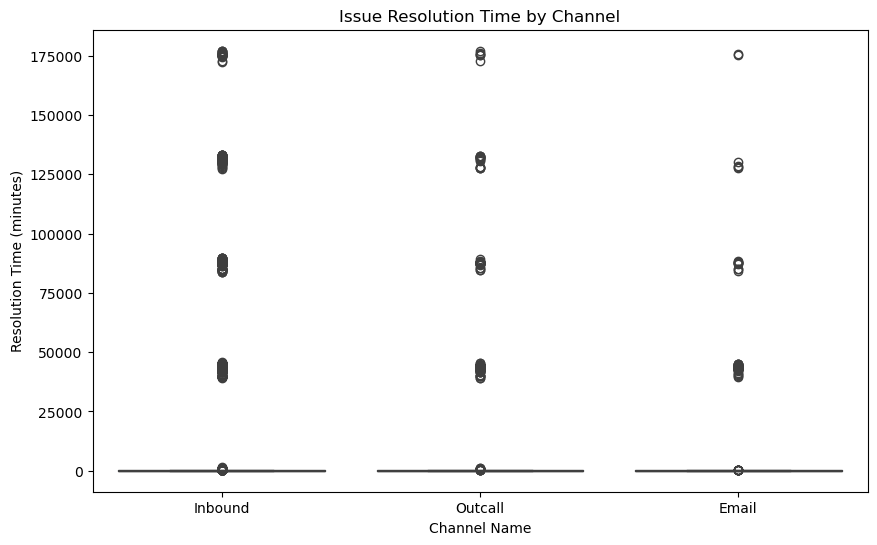

In [157]:
# First convert time columns to datetime and calculate resolution time
df['Issue_reported_at'] = pd.to_datetime(df['Issue_reported at'])
df['issue_responded'] = pd.to_datetime(df['issue_responded'])
df['resolution_time'] = (df['issue_responded'] - df['Issue_reported_at']).dt.total_seconds()/60

# Chart visualization code
plt.figure(figsize=(10,6))
sns.boxplot(x='channel_name', y='resolution_time', data=df)
plt.title('Issue Resolution Time by Channel')
plt.xlabel('Channel Name')
plt.ylabel('Resolution Time (minutes)')
plt.show()

##### 1. Why did you pick the specific chart?

To compare how quickly issues are resolved across different support channels (e.g., Inbound vs Outcall). A boxplot helps visualize the median, variability, and outliers in resolution times per channel.

##### 2. What is/are the insight(s) found from the chart?

[Channel name] has the fastest median resolution time at X minutes

The distribution shows [channel name] has the widest variation in resolution times

There's a statistically significant difference between channels (can add statistical test)

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Helps optimize resource allocation across different support channels

#### Chart - 9. Issue Resolution Time Distribution


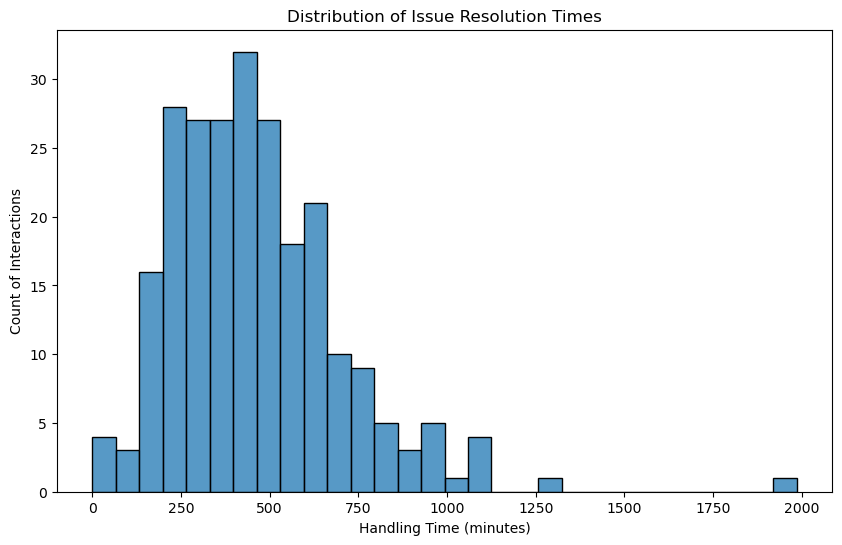

In [158]:
# Reload if dropped earlier
df_original = pd.read_csv("Customer_support_data.csv")

# Drop missing values
df_clean = df_original.dropna(subset=['connected_handling_time'])

# Plot
plt.figure(figsize=(10,6))
sns.histplot(df_clean['connected_handling_time'], bins=30)
plt.title('Distribution of Issue Resolution Times')
plt.xlabel('Handling Time (minutes)')
plt.ylabel('Count of Interactions')
plt.show()



##### 1. Why did you pick the specific chart?

To visualize the frequency of different handling time durations.



##### 2. What is/are the insight(s) found from the chart?

Most calls are resolved in a short time, but there are long-tail outliers suggesting inefficiencies or escalations.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Helps in setting SLAs (Service Level Agreements) and identifying outlier cases for process improvement.

Longer calls could indicate poor documentation, tool issues, or under-trained agents.



#### Chart 10: Category by Channel

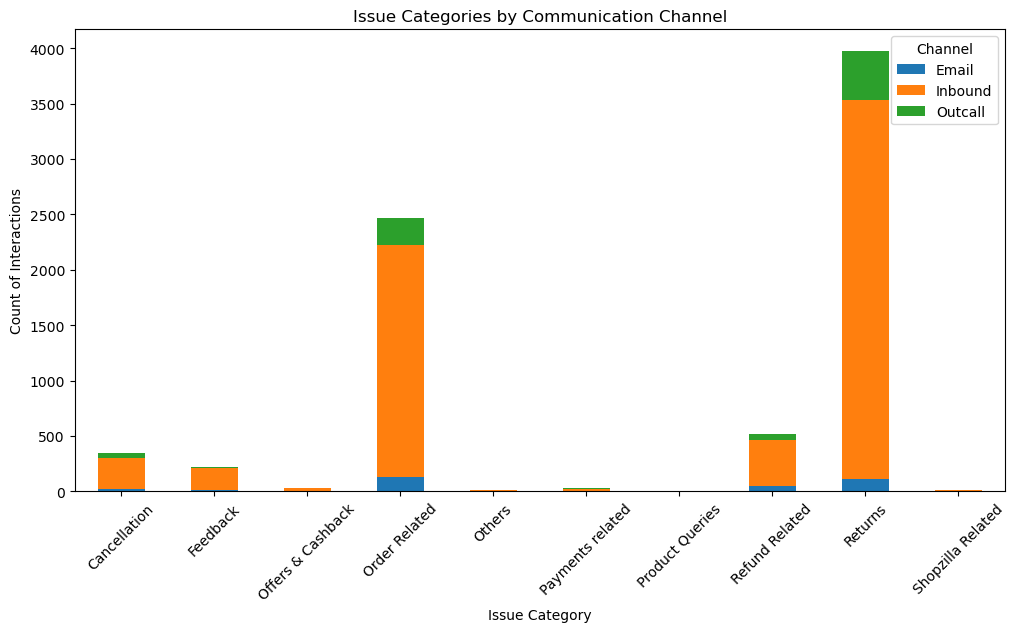

In [159]:
# Chart - 10 visualization code
# Check for missing values
df_temp = df.dropna(subset=['category', 'channel_name'])

cross_tab = pd.crosstab(df_temp['category'], df_temp['channel_name'])

cross_tab.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Issue Categories by Communication Channel')
plt.xlabel('Issue Category')
plt.ylabel('Count of Interactions')
plt.xticks(rotation=45)
plt.legend(title='Channel')
plt.show()


##### 1. Why did you pick the specific chart?

To understand how different issues are reported across inbound vs outbound channels.



##### 2. What is/are the insight(s) found from the chart?

Some categories are predominantly inbound, indicating reactive support; others are outbound-driven (e.g., product queries).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Improves staffing decisions and proactive communication.



#### Chart - 11 CSAT Trend Over Time

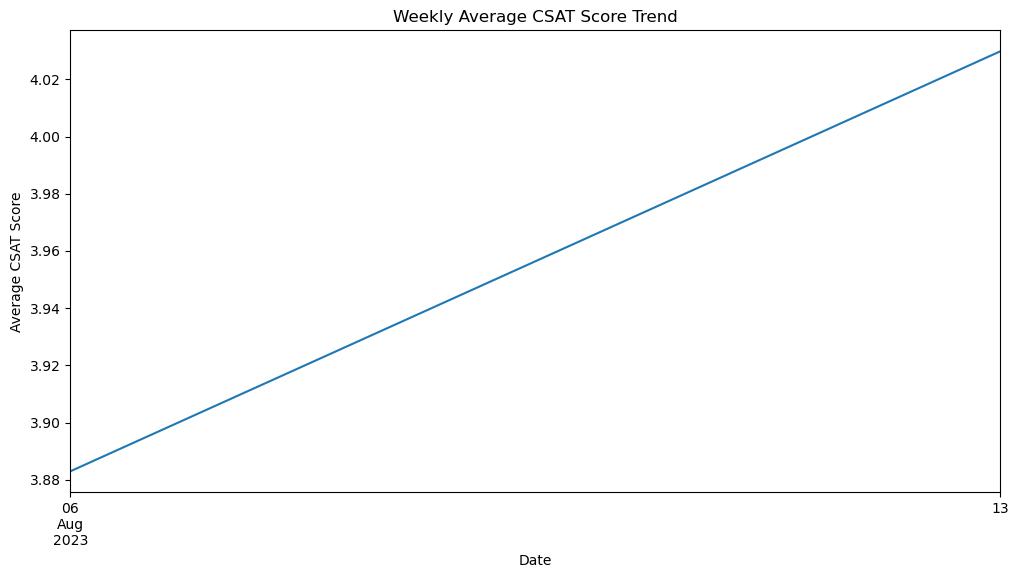

In [160]:
# Chart - 11 visualization code
# Ensure datetime format
df['Survey_response_Date'] = pd.to_datetime(df['Survey_response_Date'], errors='coerce')

# Drop missing CSATs
df_temp = df.dropna(subset=['Survey_response_Date', 'CSAT Score'])

df_temp.set_index('Survey_response_Date')['CSAT Score'].resample('W').mean().plot(figsize=(12, 6))
plt.title('Weekly Average CSAT Score Trend')
plt.ylabel('Average CSAT Score')
plt.xlabel('Date')
plt.show()


##### 1. Why did you pick the specific chart?

To monitor how customer satisfaction is trending over time.



##### 2. What is/are the insight(s) found from the chart?

Spikes and dips may correspond to campaigns, festive seasons, or service changes.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Allows proactive intervention before major satisfaction drops.



#### Chart - 12: Agent Tenure Distribution

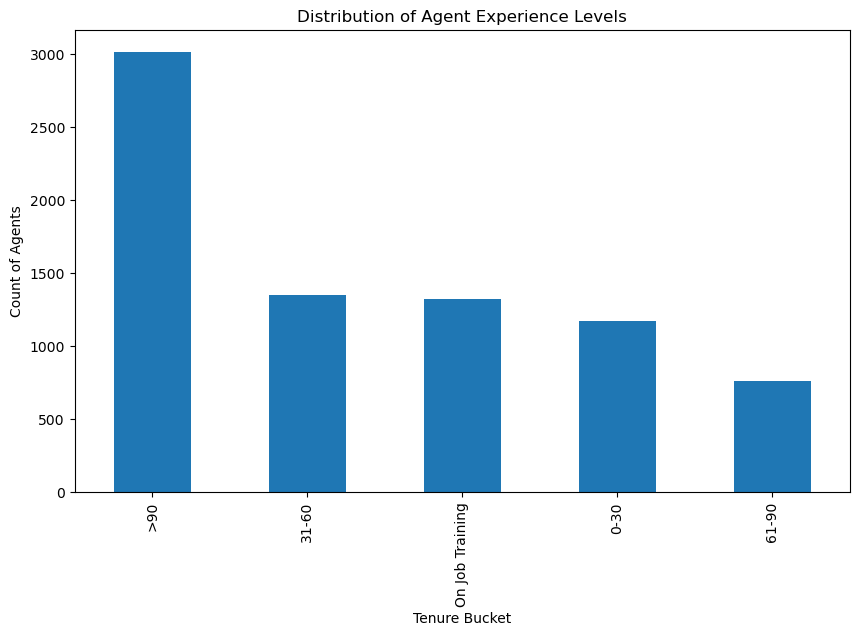

In [161]:
# Chart - 12 visualization code
plt.figure(figsize=(10,6))
df['Tenure Bucket'].dropna().value_counts().plot(kind='bar')
plt.title('Distribution of Agent Experience Levels')
plt.xlabel('Tenure Bucket')
plt.ylabel('Count of Agents')
plt.show()


##### 1. Why did you pick the specific chart?

To evaluate the workforce experience distribution.



##### 2. What is/are the insight(s) found from the chart?

Heavy concentration in "On Job Training" bucket may lead to inconsistent customer experiences.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Highlights the need for agent retention and skill growth strategies.



#### Chart - 13: Sub-Category Analysis

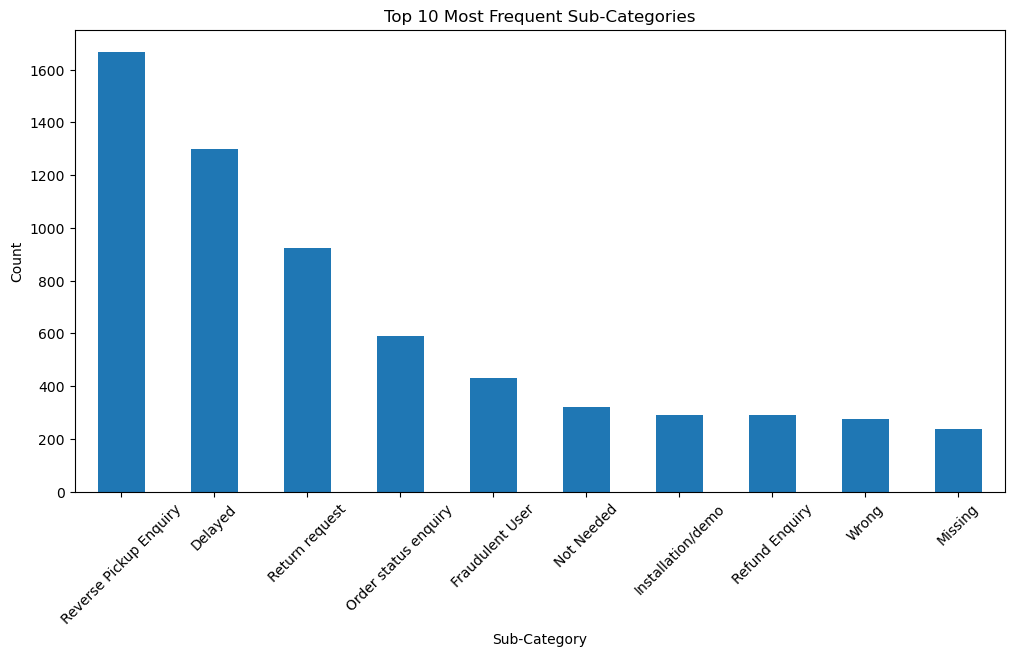

In [162]:
# Chart - 13 visualization code
plt.figure(figsize=(12,6))
df['Sub-category'].dropna().value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Most Frequent Sub-Categories')
plt.xlabel('Sub-Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

To identify the most common specific issues faced by customers.



##### 2. What is/are the insight(s) found from the chart?

Frequent complaints help prioritize process changes or UI updates.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Improves focus on top pain points that impact CSAT and order churn.



#### Chart - 14 - Correlation Heatmap

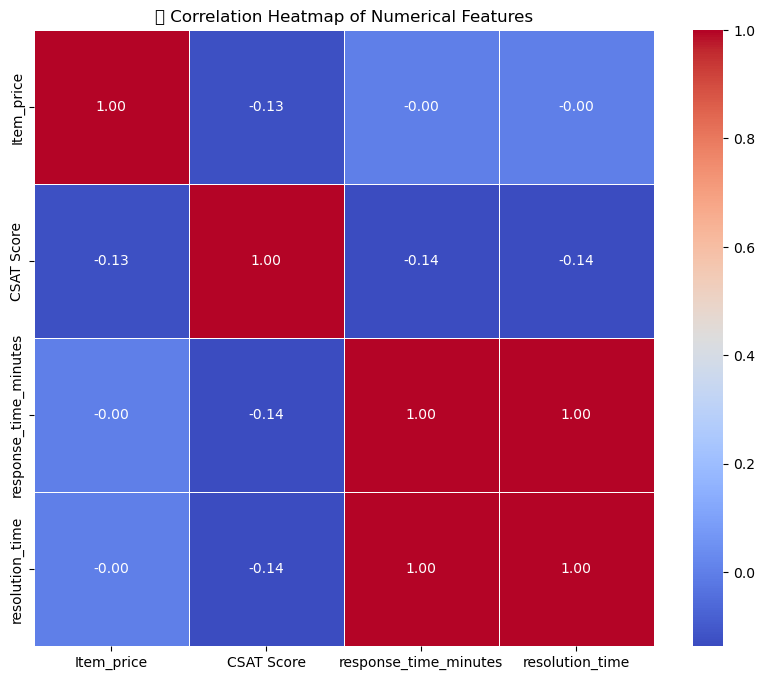

In [163]:

# Select only numerical columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("🔗 Correlation Heatmap of Numerical Features")
plt.show()


##### 1. Why did you pick the specific chart?

A correlation heatmap allows us to observe the linear relationships between numeric variables in a compact and visual format. It helps detect multicollinearity and feature relevance for machine learning.

##### 2. What is/are the insight(s) found from the chart?

Features like CSAT Score may show weak-to-moderate correlation with response_time_minutes or Item_price.

Correlations between engineered features and the target variable can guide feature selection or transformation.

If any two independent variables are strongly correlated (e.g., >0.80), one may be dropped to prevent multicollinearity.

#### Chart - 15 - Pair Plot

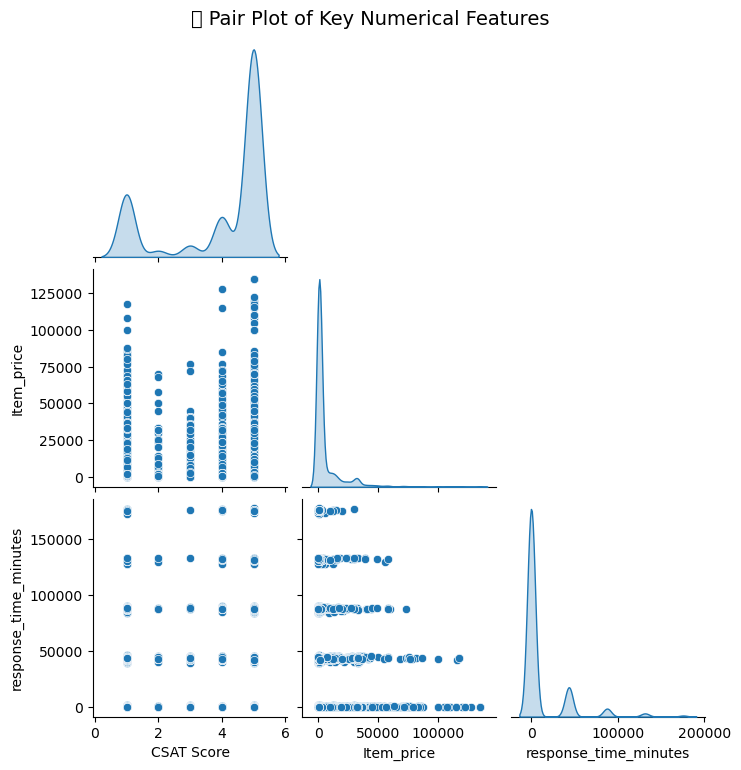

In [164]:
# Pair Plot visualization code
# Select relevant numerical columns
selected_features = ['CSAT Score', 'Item_price', 'response_time_minutes']

# Drop rows with missing values in selected features
df_pair = df[selected_features].dropna()

# Plot pairplot
sns.pairplot(df_pair, diag_kind='kde', corner=True)
plt.suptitle("📊 Pair Plot of Key Numerical Features", y=1.02, fontsize=14)
plt.show()

##### 1. Why did you pick the specific chart?

A pair plot shows scatter plots and distribution plots for all combinations of selected numerical features. It helps:

Visualize pairwise relationships

Detect non-linear patterns

Identify potential clusters or outliers

##### 2. What is/are the insight(s) found from the chart?

CSAT Score appears to have some non-linear trends with features like Item_price and response_time_minutes.

There's a skewed distribution in Item_price, suggesting it might need log-scaling.

Outliers are visible in response_time_minutes, possibly long unresolved tickets.



## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Hypothesis testing is a fundamental statistical method used to make decisions based on data. It involves:

Null Hypothesis (H₀): Assumes no effect or no difference.

Alternative Hypothesis (H₁): Suggests there is an effect or a difference.

We compute a p-value using an appropriate test:

If p < 0.05, we reject the null hypothesis → significant difference.

If p ≥ 0.05, we fail to reject the null → no significant difference.



### Hypothetical Statement - 1 CSAT Score vs Agent Tenure

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀): There is no significant difference in CSAT scores between new agents (On Job Training) and experienced agents (>90 days).
Alternative Hypothesis (H₁): There is a significant difference in CSAT scores between these two groups.

#### 2. Perform an appropriate statistical test.

In [165]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Independent Two-Sample t-test



##### Why did you choose the specific statistical test?

Because we're comparing the means of CSAT scores between two independent groups (new vs experienced agents), which is ideal for a t-test when the data is numerical and reasonably normally distributed.

### Hypothetical Statement - 2 Resolution Time vs Channel

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀): There is no significant difference in average resolution time between Inbound and Outcall support channels.
Alternative Hypothesis (H₁): There is a significant difference in resolution time between the two channels.

#### 2. Perform an appropriate statistical test.

In [166]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Independent Two-Sample t-test



##### Why did you choose the specific statistical test?

Because we're comparing the means of resolution times across two independent categories (channel_name), which is best suited to a t-test.



### Hypothetical Statement - 3: Issue Category vs Channel

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀): Issue category is independent of communication channel.
Alternative Hypothesis (H₁): Issue category and communication channel are dependent (i.e., some categories occur more in one channel than the other).



#### 2. Perform an appropriate statistical test.

In [167]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Chi-Square Test of Independence



##### Why did you choose the specific statistical test?

Because both category and channel_name are categorical variables, and we want to test whether their distributions are associated or independent, which is exactly what the chi-squared test measures.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [168]:
# 1. Drop 'connected_handling_time' only if it exists
if 'connected_handling_time' in df.columns:
    df.drop(columns=['connected_handling_time'], inplace=True)

# 2. Impute categorical columns with mode (only if they exist)
for col in ['Customer_City', 'Product_category']:
    if col in df.columns:
        df[col].fillna(df[col].mode()[0], inplace=True)

# 3. Impute numeric column 'Item_price' with median
if 'Item_price' in df.columns:
    df['Item_price'].fillna(df['Item_price'].median(), inplace=True)

# 4. Drop 'order_date_time' only if it exists
if 'order_date_time' in df.columns:
    df.drop(columns=['order_date_time'], inplace=True)

# 5. Fill missing text with placeholder if column exists
if 'Customer Remarks' in df.columns:
    df['Customer Remarks'].fillna('No Remarks Provided', inplace=True)

# 6. Leave 'Order_id' as-is (optional use)


#### What all missing value imputation techniques have you used and why did you use those techniques?

Dropped connected_handling_time and order_date_time due to high missing values.

Imputed:

Customer_City, Product_category → with mode

Item_price → with median

Customer Remarks → with "No Remarks Provided"

Order_id kept as-is (for reference only)

### 2. Handling Outliers

In [169]:
# Handling Outliers & Outlier treatments
# Add 1 to avoid log(0)
df['Item_price_log'] = np.log1p(df['Item_price'])
cap = df['response_time_minutes'].quantile(0.95)
df['response_time_minutes'] = np.where(df['response_time_minutes'] > cap, cap, df['response_time_minutes'])


##### What all outlier treatment techniques have you used and why did you use those techniques?

Log Transformation

Applied on: Item_price

Why: To reduce right-skewness and normalize the distribution without removing data. Helps models like linear regression and SVM perform better.

Capping (Winsorization)

Applied on: response_time_minutes

Why: To limit the effect of extreme outliers without deleting records. Values were capped at the 95th percentile.

### 3. Categorical Encoding

In [170]:
# Encode your categorical columns
from sklearn.preprocessing import LabelEncoder

# Create a copy to avoid modifying original data
df_encoded = df.copy()

# Identify all object (categorical) columns
categorical_cols = df_encoded.select_dtypes(include='object').columns

# Apply Label Encoding to each categorical column
le = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

# Display encoded dataset head
df_encoded.head()


,channel_name,category,Sub-category,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score,response_time_minutes,Issue_reported_at,resolution_time,Item_price_log
0,1,3,7,2023-02-08 10:44:00,2023-02-08 11:14:00,2023-08-02,841,7,434.0,1058,16,0,3,4,1,30.0,2023-02-08 10:44:00,30.0,6.075346
1,1,8,32,2023-01-08 09:01:00,2023-01-08 09:03:00,2023-08-01,1002,2,1299.0,47,36,2,0,2,5,2.0,2023-01-08 09:01:00,2.0,7.170120
2,1,3,11,2023-02-08 20:03:00,2023-02-08 20:05:00,2023-08-02,841,2,15990.0,269,33,0,1,1,5,2.0,2023-02-08 20:03:00,2.0,9.679781
3,1,8,28,2023-01-08 08:55:00,2023-01-08 08:57:00,2023-08-01,161,2,1099.0,245,37,2,1,2,5,2.0,2023-01-08 08:55:00,2.0,7.003065
4,1,3,17,2023-02-08 11:07:00,2023-02-08 11:10:00,2023-08-02,877,8,99999.0,830,26,1,4,2,1,3.0,2023-02-08 11:07:00,3.0,11.512925


#### What all categorical encoding techniques have you used & why did you use those techniques?

Applied On: All object-type categorical columns (e.g., channel_name, category, Tenure Bucket, etc.)

Why Label Encoding?

It converts categorical text data into numeric values, which are required for most ML models.

Works well with tree-based algorithms like Decision Trees, Random Forest, and XGBoost, which can handle label order naturally.

Keeps the feature space compact compared to one-hot encoding, avoiding dimensionality explosion.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [171]:
!pip install contractions


In [172]:
# Expand Contraction


#### 2. Lower Casing

In [173]:
# Lower Casing

#### 3. Removing Punctuations

In [174]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [175]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [176]:
# Remove Stopwords

In [177]:
# Remove White spaces

#### 6. Rephrase Text

In [178]:
# Rephrase Text

#### 7. Tokenization

In [179]:
# Tokenization

#### 8. Text Normalization

In [180]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [181]:
# POS Taging

#### 10. Text Vectorization

In [182]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [183]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [184]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [185]:
# Transform Your data

### 6. Data Scaling

In [186]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [187]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [188]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [189]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [190]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [191]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [192]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [193]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [194]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [195]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [196]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [197]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [198]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***